In [1]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_grad import GradientAnnealing
from hook import discrete_hook

import random
random.seed(99)

In [2]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

In [3]:
N1 = 1000
N2 = 1000
Ef = 2
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


(2, 1000, 1000)


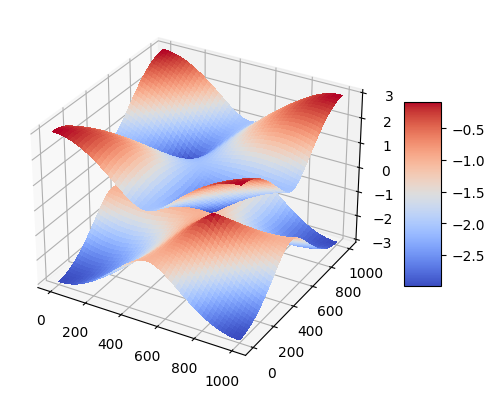

In [4]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [2.76924752e-09 2.76924752e-09 2.76924752e-09 2.76924752e-09
 2.76924752e-09]


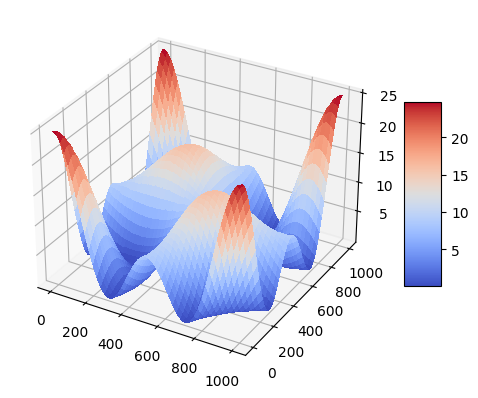

In [5]:
def fit_function(x):

    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 1, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-N1,N1],[-N2,N2]],

    'nr_neighbours': 1,
    'gaussian_sd':5,
    
    'gradient_influence':0.45,
    'delta_p': 0.2,
    'g_step_size':7,
    'step_size': 4,
    
    
    
    'known_min': 8.76763323079435e-05
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
start_point = [20, 30]

# Experiment
experiment = GradientAnnealing(fit_function,start_point, model_par)

In [7]:
epochs= 5
history_book = experiment.evolve( epochs, prints_p=5)

temp:1|epoch:0|change:0.01943714003585484|value:24.471051460106803
temp:0.09090909090909091|epoch:0|change:0.09000950922231965|value:24.648041908699966
temp:0.047619047619047616|epoch:0|change:0.07747256088665466|value:24.648041908699966
temp:0.03225806451612903|epoch:0|change:-0.173707761396237|value:22.409228717967704
temp:0.024390243902439025|epoch:0|change:-1.1424521584868899|value:19.444364825167924
temp:0.0196078431372549|epoch:0|change:0.11255552797430113|value:17.437879106345978
temp:0.01639344262295082|epoch:0|change:0.21363696399555288|value:15.976747220944022
temp:0.014084507042253523|epoch:0|change:-0.2340402598402367|value:15.036058757203799
temp:0.01234567901234568|epoch:0|change:1.1601484548335197|value:15.036058757203799
temp:0.010989010989010988|epoch:0|change:-0.12641280911362784|value:10.752539877444123
temp:0.0099009900990099|epoch:0|change:1.4768674892442917|value:8.581295513575363
temp:0.009009009009009007|epoch:0|change:1.6879941603026847|value:7.77766491365432
t

In [8]:
final_solution = experiment.actual_solution
final_value = fit_function(experiment.actual_solution)
print("final_solution:",final_solution)
print("final_value:",final_value)

final_solution: [-142, 190]
final_value: 3.81571185494528e-05


In [9]:
solutions = []
solution_values=[]
for s1 in range(-1000,1000 ,100):
    for s2 in range(-800,800, 100):
        start_point =[s1,s2]
        experiment = GradientAnnealing(fit_function,start_point, model_par)
        experiment.evolve( epochs, prints_p=999, tr_print=False)
        solutions.append(experiment.actual_solution)
        solution_values.append(experiment.actual_value)
        print("start points:{} |solution:{} |value:{}".format(start_point,experiment.actual_solution,experiment.actual_value))

start points:[-1000, -800] |solution:[-996, -708] |value:2.1971455697821343e-05
start points:[-1000, -700] |solution:[-943, -686] |value:5.838037837252252e-06
start points:[-1000, -600] |solution:[-980, -700] |value:7.339717786616554e-05
start points:[-1000, -500] |solution:[-974, -698] |value:3.856830318596348e-05
start points:[-1000, -400] |solution:[-997, -289] |value:5.237083147888252e-05
start points:[-1000, -300] |solution:[-999, -290] |value:4.845139995565304e-05
start points:[-1000, -200] |solution:[-962, -269] |value:1.600404231201315e-05
start points:[-1000, -100] |solution:[-935, -252] |value:4.789993469698155e-05
start points:[-1000, 0] |solution:[-972, 303] |value:6.1686646935512e-06
start points:[-1000, 100] |solution:[-973, 303] |value:6.023621615225647e-05
start points:[-1000, 200] |solution:[-943, 314] |value:5.838037837237132e-06
start points:[-1000, 300] |solution:[-896, 327] |value:2.166408570998706e-05
start points:[-1000, 400] |solution:[-955, 310] |value:1.504168

start points:[-400, 400] |solution:[-306, 729] |value:3.376082440458883e-07
start points:[-400, 500] |solution:[-307, 730] |value:3.067039152449187e-05
start points:[-400, 600] |solution:[-311, 737] |value:1.8783939222060374e-06
start points:[-400, 700] |solution:[-324, 766] |value:5.4570006893995257e-05
start points:[-300, -800] |solution:[-178, -845] |value:4.113101701034981e-06
start points:[-300, -700] |solution:[-100, -774] |value:4.550234383048175e-07
start points:[-300, -600] |solution:[-116, -329] |value:3.412770953626124e-08
start points:[-300, -500] |solution:[-285, -295] |value:3.18537534310253e-06
start points:[-300, -400] |solution:[-268, -308] |value:1.8774615123842505e-06
start points:[-300, -300] |solution:[-302, -277] |value:1.745090343870256e-05
start points:[-300, -200] |solution:[-330, -205] |value:7.548875066909334e-05
start points:[-300, -100] |solution:[-276, 26] |value:3.8568303185964724e-05
start points:[-300, 0] |solution:[-283, 14] |value:2.341918815309396e-0

start points:[300, 400] |solution:[260, 312] |value:8.203613042213608e-05
start points:[300, 500] |solution:[277, 302] |value:1.745090343870256e-05
start points:[300, 600] |solution:[249, 318] |value:1.478716735486494e-06
start points:[300, 700] |solution:[191, 859] |value:1.794686584352488e-05
start points:[400, -800] |solution:[312, -739] |value:2.642448406618337e-07
start points:[400, -700] |solution:[289, -708] |value:5.2370831478893504e-05
start points:[400, -600] |solution:[305, -728] |value:1.6854200704413052e-05
start points:[400, -500] |solution:[279, -700] |value:4.707798289664251e-06
start points:[400, -400] |solution:[692, -267] |value:6.331240955261542e-05
start points:[400, -300] |solution:[682, -248] |value:3.6421499136475345e-05
start points:[400, -200] |solution:[260, -52] |value:8.203613042211942e-05
start points:[400, -100] |solution:[282, -16] |value:1.2967850774614715e-05
start points:[400, 0] |solution:[292, 3] |value:5.237083147890832e-05
start points:[400, 100] 

In [10]:
solutions

[[-996, -708],
 [-943, -686],
 [-980, -700],
 [-974, -698],
 [-997, -289],
 [-999, -290],
 [-962, -269],
 [-935, -252],
 [-972, 303],
 [-973, 303],
 [-943, 314],
 [-896, 327],
 [-955, 310],
 [-996, 712],
 [-948, 740],
 [-995, 712],
 [-877, -670],
 [-876, -670],
 [-860, -668],
 [-860, -668],
 [-993, -287],
 [-900, -226],
 [-896, -223],
 [-814, -147],
 [-782, -110],
 [-683, 67],
 [-957, 309],
 [-898, 326],
 [-879, 330],
 [-863, 332],
 [-995, 712],
 [-931, 751],
 [-748, -683],
 [-823, -667],
 [-825, -667],
 [-853, -667],
 [-781, -672],
 [-853, -186],
 [-825, -158],
 [-794, -124],
 [-724, -26],
 [-681, 72],
 [-776, 326],
 [-813, 333],
 [-828, 333],
 [-777, 327],
 [-931, 751],
 [-884, 787],
 [-669, -799],
 [-713, -706],
 [-693, -730],
 [-802, -669],
 [-761, -678],
 [-886, -215],
 [-817, -150],
 [-755, -75],
 [-743, -57],
 [-675, 94],
 [-672, 216],
 [-736, 310],
 [-742, 314],
 [-770, 325],
 [-764, 323],
 [-832, 835],
 [-667, -819],
 [-702, -719],
 [-710, -709],
 [-707, -713],
 [-740, -688],


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_73381/4267174279.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


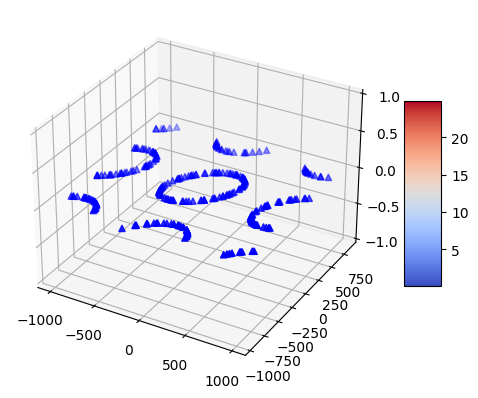

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [12]:
# Clen the results
tollerance = model_par['known_min']
clean_solutions=[]
for i in range(len(solutions)):
    if solution_values[i] <= tollerance:
        clean_solutions.append(solutions[i])

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_73381/3868486351.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


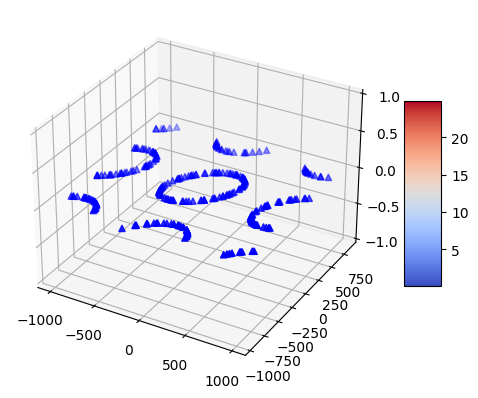

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(clean_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [ ]:
# now we need to be sure that we extract a complet contour

explored = []

total_solutions = []
total_values = []
for solution in clean_solutions:
    if solution not in explored:
        explored.append(solution)
        
        extend_solutions, extended_values = discrete_hook(fit_function,solution,boundary=[[-N1,N1],[N2,N2]],tolerance =0.05)
        print("extended_solutions:",extend_solutions)
        for i in range(len(extend_solutions)):
            s=extend_solutions[i]
            v= extended_values[i]
            total_solutions.append(s)
            total_values.append(v)

extended_solutions: [[-996, -708], [-995, -708], [-996, -707], [-997, -708], [-996, -709], [-997, -709], [-995, -707], [-995, -709], [-997, -707], [-998, -710], [-994, -706], [-994, -708], [-996, -708], [-994, -707], [-994, -709], [-997, -710], [-993, -706], [-993, -708], [-996, -706], [-995, -706], [-997, -706], [-998, -709], [-994, -705], [-998, -708], [-998, -707], [-999, -710], [-996, -710], [-995, -710], [-998, -711], [-999, -711], [-993, -705], [-993, -707], [-994, -710], [-997, -711], [-993, -709], [-998, -706], [-999, -709], [-995, -705], [-1000, -712], [-992, -704], [-992, -706], [-992, -708], [-992, -705], [-992, -707], [-993, -710], [-996, -711], [-992, -709], [-999, -712], [-991, -704], [-991, -706], [-991, -708], [-996, -705], [-997, -705], [-994, -704], [-993, -704], [-998, -705], [-999, -708], [-995, -704], [-1000, -711], [-992, -703], [-999, -707], [-1000, -710], [-999, -706], [-1000, -709], [-995, -711], [-998, -712], [-994, -711], [-997, -712], [-1000, -713], [-991, -

extended_solutions: [[-943, -686], [-942, -686], [-943, -685], [-944, -686], [-943, -687], [-944, -687], [-942, -685], [-942, -687], [-944, -685], [-945, -688], [-941, -684], [-941, -686], [-943, -686], [-941, -685], [-941, -687], [-944, -688], [-940, -684], [-940, -686], [-943, -684], [-942, -684], [-944, -684], [-945, -687], [-941, -683], [-945, -686], [-945, -685], [-946, -688], [-943, -688], [-942, -688], [-945, -689], [-946, -689], [-940, -683], [-940, -685], [-941, -688], [-944, -689], [-940, -687], [-945, -684], [-946, -687], [-942, -683], [-947, -690], [-939, -682], [-939, -684], [-939, -686], [-939, -683], [-939, -685], [-940, -688], [-943, -689], [-939, -687], [-946, -690], [-938, -682], [-938, -684], [-938, -686], [-943, -683], [-944, -683], [-941, -682], [-940, -682], [-945, -683], [-946, -686], [-942, -682], [-947, -689], [-939, -681], [-946, -685], [-947, -688], [-946, -684], [-947, -687], [-948, -690], [-942, -689], [-945, -690], [-941, -689], [-944, -690], [-947, -691],

extended_solutions: [[-980, -700], [-979, -700], [-980, -699], [-981, -700], [-980, -701], [-981, -701], [-979, -699], [-979, -701], [-981, -699], [-982, -702], [-978, -698], [-978, -700], [-980, -700], [-978, -699], [-978, -701], [-981, -702], [-977, -698], [-977, -700], [-980, -698], [-979, -698], [-981, -698], [-982, -701], [-978, -697], [-982, -700], [-982, -699], [-983, -702], [-980, -702], [-979, -702], [-982, -703], [-983, -703], [-977, -697], [-977, -699], [-978, -702], [-981, -703], [-977, -701], [-982, -698], [-983, -701], [-979, -697], [-984, -704], [-976, -696], [-976, -698], [-976, -700], [-976, -697], [-976, -699], [-977, -702], [-980, -703], [-976, -701], [-983, -704], [-975, -696], [-975, -698], [-975, -700], [-980, -697], [-981, -697], [-978, -696], [-977, -696], [-982, -697], [-983, -700], [-979, -696], [-984, -703], [-976, -695], [-983, -699], [-984, -702], [-983, -698], [-984, -701], [-985, -704], [-979, -703], [-982, -704], [-978, -703], [-981, -704], [-984, -705],

extended_solutions: [[-974, -698], [-973, -698], [-974, -697], [-975, -698], [-974, -699], [-975, -699], [-973, -697], [-973, -699], [-975, -697], [-976, -700], [-972, -696], [-972, -698], [-974, -698], [-972, -697], [-972, -699], [-975, -700], [-971, -696], [-971, -698], [-974, -696], [-973, -696], [-975, -696], [-976, -699], [-972, -695], [-976, -698], [-976, -697], [-977, -700], [-974, -700], [-973, -700], [-976, -701], [-977, -701], [-971, -695], [-971, -697], [-972, -700], [-975, -701], [-971, -699], [-976, -696], [-977, -699], [-973, -695], [-978, -702], [-970, -694], [-970, -696], [-970, -698], [-970, -695], [-970, -697], [-971, -700], [-974, -701], [-970, -699], [-977, -702], [-969, -694], [-969, -696], [-969, -698], [-974, -695], [-975, -695], [-972, -694], [-971, -694], [-976, -695], [-977, -698], [-973, -694], [-978, -701], [-970, -693], [-977, -697], [-978, -700], [-977, -696], [-978, -699], [-979, -702], [-973, -701], [-976, -702], [-972, -701], [-975, -702], [-978, -703],

extended_solutions: [[-997, -289], [-996, -289], [-997, -288], [-998, -289], [-997, -290], [-998, -290], [-996, -288], [-996, -290], [-998, -288], [-999, -291], [-995, -287], [-995, -289], [-997, -289], [-995, -288], [-995, -290], [-998, -291], [-994, -287], [-994, -289], [-997, -287], [-996, -287], [-998, -287], [-999, -290], [-995, -286], [-999, -289], [-999, -288], [-1000, -291], [-997, -291], [-996, -291], [-999, -292], [-1000, -292], [-994, -286], [-994, -288], [-995, -291], [-998, -292], [-994, -290], [-999, -287], [-1000, -290], [-996, -286], [-993, -285], [-993, -287], [-993, -289], [-993, -286], [-993, -288], [-994, -291], [-997, -292], [-993, -290], [-1000, -293], [-992, -285], [-992, -287], [-992, -289], [-997, -286], [-998, -286], [-995, -285], [-994, -285], [-999, -286], [-1000, -289], [-996, -285], [-993, -284], [-1000, -288], [-1000, -287], [-996, -292], [-999, -293], [-995, -292], [-998, -293], [-992, -284], [-992, -286], [-992, -288], [-994, -292], [-997, -293], [-993,

extended_solutions: [[-999, -290], [-998, -290], [-999, -289], [-1000, -290], [-999, -291], [-1000, -291], [-998, -289], [-998, -291], [-1000, -289], [-997, -288], [-997, -290], [-999, -290], [-997, -289], [-997, -291], [-1000, -292], [-996, -288], [-996, -290], [-999, -288], [-998, -288], [-1000, -288], [-997, -287], [-999, -292], [-998, -292], [-996, -287], [-996, -289], [-997, -292], [-1000, -293], [-996, -291], [-998, -287], [-995, -286], [-995, -288], [-995, -290], [-995, -287], [-995, -289], [-996, -292], [-999, -293], [-995, -291], [-994, -286], [-994, -288], [-994, -290], [-999, -287], [-1000, -287], [-997, -286], [-996, -286], [-998, -286], [-995, -285], [-998, -293], [-997, -293], [-1000, -294], [-994, -285], [-994, -287], [-994, -289], [-996, -293], [-999, -294], [-995, -292], [-994, -291], [-999, -286], [-996, -285], [-993, -284], [-993, -286], [-993, -288], [-993, -290], [-993, -285], [-993, -287], [-993, -289], [-995, -293], [-998, -294], [-994, -292], [-993, -291], [-992

extended_solutions: [[-962, -269], [-961, -269], [-962, -268], [-963, -269], [-962, -270], [-963, -270], [-961, -268], [-961, -270], [-963, -268], [-964, -271], [-960, -267], [-960, -269], [-962, -269], [-960, -268], [-960, -270], [-963, -271], [-959, -267], [-959, -269], [-962, -267], [-961, -267], [-963, -267], [-964, -270], [-960, -266], [-964, -269], [-964, -268], [-965, -271], [-962, -271], [-961, -271], [-964, -272], [-965, -272], [-959, -266], [-959, -268], [-960, -271], [-963, -272], [-959, -270], [-964, -267], [-965, -270], [-961, -266], [-966, -273], [-958, -265], [-958, -267], [-958, -269], [-958, -266], [-958, -268], [-959, -271], [-962, -272], [-958, -270], [-965, -273], [-957, -265], [-957, -267], [-957, -269], [-962, -266], [-963, -266], [-960, -265], [-959, -265], [-964, -266], [-965, -269], [-961, -265], [-966, -272], [-958, -264], [-965, -268], [-966, -271], [-965, -267], [-966, -270], [-967, -273], [-961, -272], [-964, -273], [-960, -272], [-963, -273], [-966, -274],

extended_solutions: [[-935, -252], [-934, -252], [-935, -251], [-936, -252], [-935, -253], [-936, -253], [-934, -251], [-934, -253], [-936, -251], [-937, -254], [-933, -250], [-933, -252], [-935, -252], [-933, -251], [-933, -253], [-936, -254], [-932, -250], [-932, -252], [-935, -250], [-934, -250], [-936, -250], [-937, -253], [-933, -249], [-937, -252], [-937, -251], [-938, -254], [-935, -254], [-934, -254], [-937, -255], [-938, -255], [-932, -249], [-932, -251], [-933, -254], [-936, -255], [-932, -253], [-937, -250], [-938, -253], [-934, -249], [-939, -256], [-931, -248], [-931, -250], [-931, -252], [-931, -249], [-931, -251], [-932, -254], [-935, -255], [-931, -253], [-938, -256], [-930, -248], [-930, -250], [-930, -252], [-935, -249], [-936, -249], [-933, -248], [-932, -248], [-937, -249], [-938, -252], [-934, -248], [-939, -255], [-931, -247], [-938, -251], [-939, -254], [-938, -250], [-939, -253], [-940, -256], [-934, -255], [-937, -256], [-933, -255], [-936, -256], [-939, -257],

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(total_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [ ]:
#final selection
f_select =[]
v_select =[]
minim = 8.76763323079435e-05

for i in range(len(total_solutions)):
    s = total_solutions[i]
    v = total_values[i]
    if v<=minim:
        if s not in f_select:
            f_select.append(s)
            v_select.append(v)
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(f_select, fit_function)
ax.scatter(x,y,z , c='b', marker='^')